# Human Body Weight Analysis

This Jupyter Notebook that analyzes human body weight data from various countries. The data is scraped from Wikipedia and processed to extract relevant information .

The analysis includes the following steps:
1. **Data Representation**: Organizing and presenting data in tables for clear understanding and decision-making.
2. **Data Wrangling**: Cleaning and transforming raw data into a structured format.
3. **Exploratory Data Analysis (EDA)**: Analyzing the data to uncover patterns, trends, and insights.
4. **Visualization**: Creating visual representations of the data to better understand the relationships between variables.


### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Data Gathering

### Make Request to wikipedia

In [2]:
url = "https://en.wikipedia.org/wiki/Human_body_weight"

In [3]:
response = requests.get(url=url , headers={'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/131.0.0.0 Safari/537.36'})
response

<Response [200]>

In [ ]:
response.text

### Make response at Html code using BeautifulSoup

In [ ]:
html = BeautifulSoup(response.text , 'html.parser')
html

### Get tables wikitable 

In [ ]:
tables = html.find_all('table' , {'class' : 'wikitable'})
tables

### Get Table has Average weight around the world by country

In [ ]:
country_table = tables[1]
country_table

### convert table to dataframe

In [8]:
df = pd.read_html(str(country_table))[0]

# Data Representation

In [9]:
df.head(11)

,Country,Average male weight,Average female weight,Sample population / age range,Method,Year,Ref
0,Afghanistan,69.2 kg (152.6 lb),62.6 kg (138.0 lb),18–69,Measured,2018,[12]
1,Algeria,68.7 kg (151.5 lb),65.1 kg (143.5 lb),25–64,Measured,2005,[13]
2,Armenia,74.6 kg (164.5 lb),66.4 kg (146.4 lb),18–69,Measured,2016,[14]
3,Australia,87.0 kg (191.8 lb),71.8 kg (158.3 lb),18+,Measured,2018,[15]
4,Azerbaijan,72.1 kg (159.0 lb),65.7 kg (144.8 lb),16+,Measured,2005,[16]
5,Bangladesh,55.2 kg (121.7 lb),49.8 kg (109.8 lb),25+,Measured,2009–2010,[17]
6,Belarus,69 kg (152.1 lb),56 kg (123.5 lb),18+,Measured,2008,[18]
7,Belize,74.2 kg (163.6 lb),70.5 kg (155.4 lb),20+,Measured,2010,[19]
8,Benin,63.7 kg (140.4 lb),60.9 kg (134.3 lb),18–69,Measured,2015,[20]
9,Bhutan,63.2 kg (139.3 lb),57.4 kg (126.5 lb),18–69,Measured,2014,[21]


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Country                         52 non-null     object
 1   Average male weight             52 non-null     object
 2   Average female weight           52 non-null     object
 3   Sample population /  age range  52 non-null     object
 4   Method                          52 non-null     object
 5   Year                            52 non-null     object
 6   Ref                             52 non-null     object
dtypes: object(7)
memory usage: 3.0+ KB


In [11]:
df.describe()

,Country,Average male weight,Average female weight,Sample population / age range,Method,Year,Ref
count,52,52,52,52,52,52,52
unique,52,47,50,15,2,29,52
top,Afghanistan,84.6 kg (186.5 lb),59.0 kg (130.1 lb),18–69,Measured,2018,[12]
freq,1,2,3,9,49,4,1


# Data wrangling

### Drop Ref column

In [12]:
df.drop(columns='Ref' , inplace=True)
df.head()

,Country,Average male weight,Average female weight,Sample population / age range,Method,Year
0,Afghanistan,69.2 kg (152.6 lb),62.6 kg (138.0 lb),18–69,Measured,2018
1,Algeria,68.7 kg (151.5 lb),65.1 kg (143.5 lb),25–64,Measured,2005
2,Armenia,74.6 kg (164.5 lb),66.4 kg (146.4 lb),18–69,Measured,2016
3,Australia,87.0 kg (191.8 lb),71.8 kg (158.3 lb),18+,Measured,2018
4,Azerbaijan,72.1 kg (159.0 lb),65.7 kg (144.8 lb),16+,Measured,2005


### Extract Averagae male weight  column to two columns [Avg_male_weight_Kg , Avg_male_weight_lb]

In [13]:
# Avg_male_weigth_Kg
df['Avg_male_weight_Kg'] = df['Average male weight'].str.extract(r'^(\d+\.\d+)')
df['Avg_male_weight_Kg'] = pd.to_numeric(df['Avg_male_weight_Kg'] , errors='coerce')

In [14]:
# Avg_male_weigth_lb
df['Avg_male_weight_lb'] = df['Average male weight'].str.extract(r'\((\d+\.\d+)\s*lb\)')
df['Avg_male_weight_lb'] = pd.to_numeric(df['Avg_male_weight_lb'] , errors='coerce')

### Extract Averagae female weight  column to two columns [Avg_female_weight_Kg , Avg_female_weight_lb]

In [15]:
# Avg_female_weight_kg
df['Avg_female_weight_Kg'] = df['Average female weight'].str.extract(r'^(\d+\.\d+)')
df['Avg_female_weight_Kg'] = pd.to_numeric(df['Avg_female_weight_Kg'] , errors='coerce')

In [16]:
# Avg_female_weight_lb
df['Avg_female_weight_lb'] = df['Average female weight'].str.extract(r'\((\d+\.\d+)\s*lb\)')
df['Avg_female_weight_lb'] = pd.to_numeric(df['Avg_female_weight_lb'] , errors='coerce')

### Drop Average male weight and Average female weight columns

In [17]:
df.drop(columns=['Average male weight' , 'Average female weight'] , inplace=True)

In [18]:
df.head()

,Country,Sample population / age range,Method,Year,Avg_male_weight_Kg,Avg_male_weight_lb,Avg_female_weight_Kg,Avg_female_weight_lb
0,Afghanistan,18–69,Measured,2018,69.2,152.6,62.6,138.0
1,Algeria,25–64,Measured,2005,68.7,151.5,65.1,143.5
2,Armenia,18–69,Measured,2016,74.6,164.5,66.4,146.4
3,Australia,18+,Measured,2018,87.0,191.8,71.8,158.3
4,Azerbaijan,16+,Measured,2005,72.1,159.0,65.7,144.8


### Rename Smaple population/age range to S_age_range  

In [19]:
df.rename(columns={'Sample population /  age range' : 'Age_range'} , inplace=True)

In [20]:
df.head()

,Country,Age_range,Method,Year,Avg_male_weight_Kg,Avg_male_weight_lb,Avg_female_weight_Kg,Avg_female_weight_lb
0,Afghanistan,18–69,Measured,2018,69.2,152.6,62.6,138.0
1,Algeria,25–64,Measured,2005,68.7,151.5,65.1,143.5
2,Armenia,18–69,Measured,2016,74.6,164.5,66.4,146.4
3,Australia,18+,Measured,2018,87.0,191.8,71.8,158.3
4,Azerbaijan,16+,Measured,2005,72.1,159.0,65.7,144.8


### Make new column Avg_age 

In [21]:
# Function extract_avg() 
def extract_avg(value) : 
    if '–' in value : 
        n1 , n2 = map(int, value.split('–'))
        return (n1 + n2)/2 # return avg 
    if '-' in value : 
        n1 , n2 = map(int, value.split('-'))
        return (n1 + n2)/2 # return avg 
    if '+' in value : 
        return int(value.replace('+' , ''))
    return value

In [22]:
df.head()

,Country,Age_range,Method,Year,Avg_male_weight_Kg,Avg_male_weight_lb,Avg_female_weight_Kg,Avg_female_weight_lb
0,Afghanistan,18–69,Measured,2018,69.2,152.6,62.6,138.0
1,Algeria,25–64,Measured,2005,68.7,151.5,65.1,143.5
2,Armenia,18–69,Measured,2016,74.6,164.5,66.4,146.4
3,Australia,18+,Measured,2018,87.0,191.8,71.8,158.3
4,Azerbaijan,16+,Measured,2005,72.1,159.0,65.7,144.8


In [23]:
# new column Avg_age
df['Avg_age'] = df['Age_range'].apply(extract_avg)

In [24]:
df.head()

,Country,Age_range,Method,Year,Avg_male_weight_Kg,Avg_male_weight_lb,Avg_female_weight_Kg,Avg_female_weight_lb,Avg_age
0,Afghanistan,18–69,Measured,2018,69.2,152.6,62.6,138.0,43.5
1,Algeria,25–64,Measured,2005,68.7,151.5,65.1,143.5,44.5
2,Armenia,18–69,Measured,2016,74.6,164.5,66.4,146.4,43.5
3,Australia,18+,Measured,2018,87.0,191.8,71.8,158.3,18.0
4,Azerbaijan,16+,Measured,2005,72.1,159.0,65.7,144.8,16.0


### Check missing value

In [25]:
df.isnull().sum()

Country                 0
Age_range               0
Method                  0
Year                    0
Avg_male_weight_Kg      1
Avg_male_weight_lb      2
Avg_female_weight_Kg    1
Avg_female_weight_lb    2
Avg_age                 0
dtype: int64

#### Replace missing values

In [26]:
  
df.fillna(df.iloc[: , 4:8].mean() , inplace=True)

In [27]:
df.isnull().sum()

Country                 0
Age_range               0
Method                  0
Year                    0
Avg_male_weight_Kg      0
Avg_male_weight_lb      0
Avg_female_weight_Kg    0
Avg_female_weight_lb    0
Avg_age                 0
dtype: int64

### Check duplicated values 

In [28]:
df.duplicated().sum()

0

# Exploarity data analysis EDA

In [29]:
df.head()

,Country,Age_range,Method,Year,Avg_male_weight_Kg,Avg_male_weight_lb,Avg_female_weight_Kg,Avg_female_weight_lb,Avg_age
0,Afghanistan,18–69,Measured,2018,69.2,152.6,62.6,138.0,43.5
1,Algeria,25–64,Measured,2005,68.7,151.5,65.1,143.5,44.5
2,Armenia,18–69,Measured,2016,74.6,164.5,66.4,146.4,43.5
3,Australia,18+,Measured,2018,87.0,191.8,71.8,158.3,18.0
4,Azerbaijan,16+,Measured,2005,72.1,159.0,65.7,144.8,16.0


In [30]:
df['Method'].value_counts()

Method
Measured         49
Self-reported     3
Name: count, dtype: int64

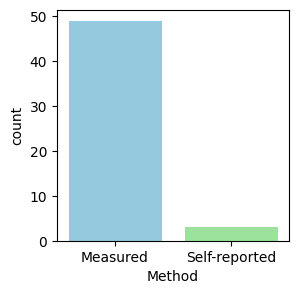

In [31]:
plt.figure(figsize=(3,3))
sns.countplot(x =df['Method'] , palette=['SkyBlue', 'LightGreen'])
plt.show()

In [32]:
df['Avg_male_weight_Kg'].describe()

count    52.000000
mean     74.873333
std       9.894936
min      55.200000
25%      65.850000
50%      75.100000
75%      84.100000
max      99.400000
Name: Avg_male_weight_Kg, dtype: float64

In [33]:
df['Avg_female_weight_Kg'].mean()

66.20764705882353

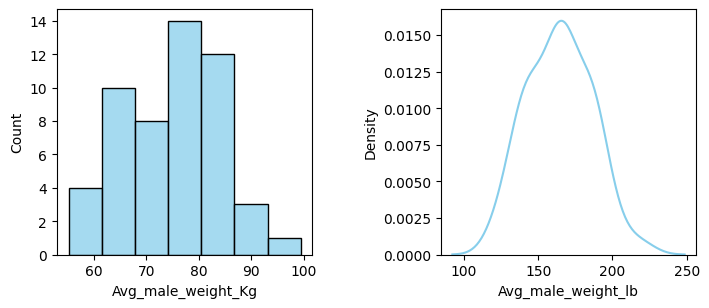

In [34]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.histplot(df['Avg_male_weight_Kg'], kde=False , color='SkyBlue')
plt.subplot(1,2,2)
sns.kdeplot(df['Avg_male_weight_lb'] , color='SkyBlue')
plt.tight_layout(pad=4)
plt.show()

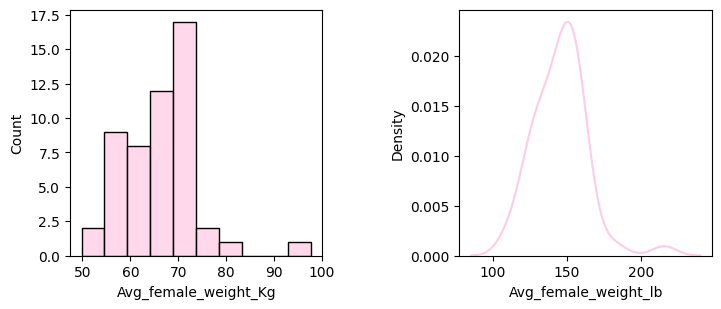

In [35]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.histplot(df['Avg_female_weight_Kg'], kde=False  , color='#FFCCE5')
plt.subplot(1,2,2)
sns.kdeplot(df['Avg_female_weight_lb'] , color='#FFCCE5')
plt.tight_layout(pad=4)
plt.show()

<Figure size 600x200 with 0 Axes>

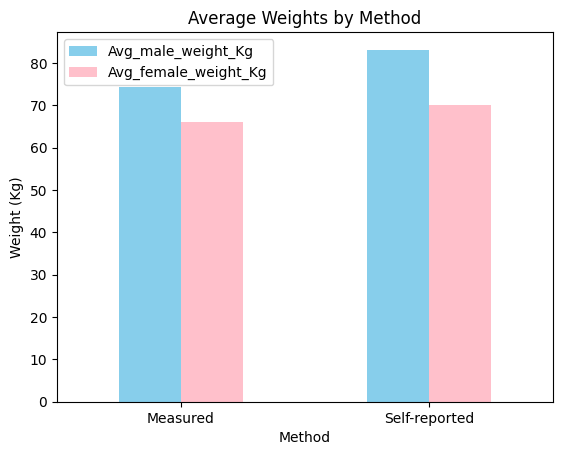

In [36]:
plt.figure(figsize=(6,2))
df.groupby('Method')[['Avg_male_weight_Kg', 'Avg_female_weight_Kg']].mean().plot(kind='bar' , color=['Skyblue', 'pink'])
plt.title("Average Weights by Method")
plt.ylabel("Weight (Kg)")
plt.xticks(rotation=0)
plt.show()

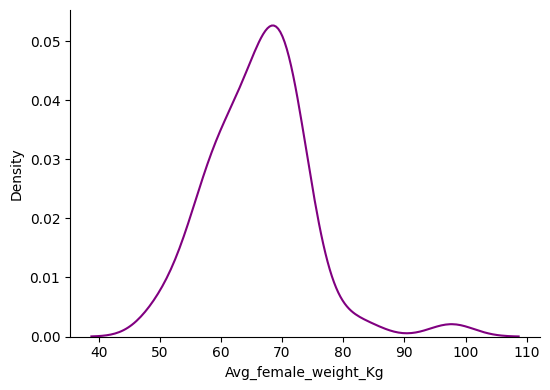

In [37]:
sns.displot(df['Avg_female_weight_Kg'] , kind= 'kde' , height=4 , aspect=1.4 , color='purple')

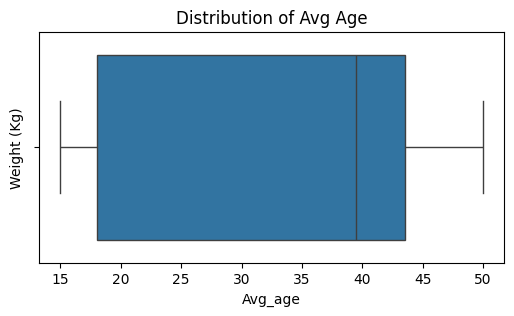

In [38]:
plt.figure(figsize=(6 , 3))
sns.boxplot(x=df['Avg_age'] )
plt.title("Distribution of Avg Age")
plt.ylabel("Weight (Kg)")
plt.show()

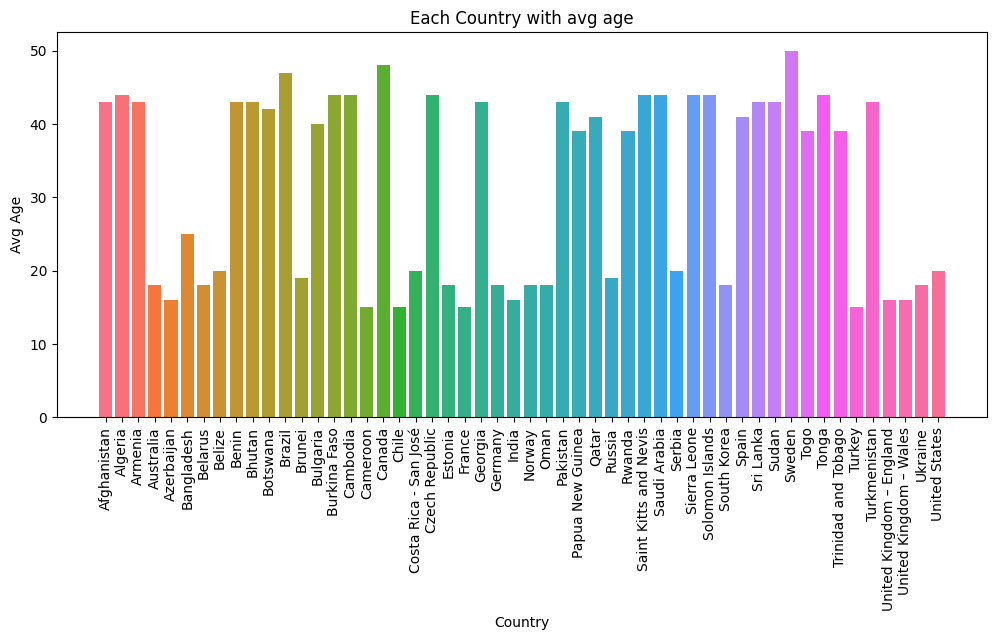

In [39]:
plt.figure(figsize=(12, 5))
plt.bar(df['Country'], df['Avg_age'].astype(int), color=sns.color_palette("husl", len(df)))
plt.xlabel("Country")
plt.ylabel("Avg Age")
plt.title("Each Country with avg age")
plt.xticks(rotation=90)
plt.show()